In [2]:
! pip install sklearn
! pip install seaborn
! pip install matplotlib

In [138]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import load_digits

from sklearn.metrics import pairwise_distances_argmin

In [139]:
from __future__ import print_function

# KMeans

In [140]:
from sklearn.metrics import pairwise_distances_argmin

def kmeans_find_clusters(X, k, iter_num=100):
    # 1. Randomly choose clusters
    n_clusters = k
    
    ind = None
    # calculate ind
    centers = X[ind]
    
    for _ in range(iter_num):
        # 2a. Assign labels based on closest center
        labels = None
        #calculate labels
        
        # 2b. Find new centers from means of points
        new_centers = None
        #calcuoate new_centers
        
        # 2c. Check for convergence
        terminate = None
        # calculate terminating condidtion
        if terminate:
            break
        
        centers = new_centers
    
    return centers, labels

# Простой пример

In [1]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

1

In [2]:
centers, labels = kmeans_find_clusters(X, k=4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

1

Зависимость от инициализации

In [3]:
#call multiple times
centers, labels = kmeans_find_clusters(X, k=4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

1

# Неподходящие формы кластеров

In [4]:
X, y = make_moons(200, noise=0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

1

In [5]:
centers, labels = kmeans_find_clusters(X, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

1

# MNIST

In [6]:
digits = load_digits()
print(digits.data.shape)
print(len(digits.target))

1

Нарисуем примеры цифр 

In [7]:
i = 2
plt.imshow(digits.images[np.where(digits.target==i)][0], cmap=plt.cm.binary)

1

In [8]:
by_digits = {}

for i in digits.target_names:
    by_digits[i] = digits.images[np.where(digits.target==i)]

1

Можно вызвать несколько раз

In [9]:
fig, ax = plt.subplots(2, 5, figsize=(5, 2))

for i in digits.target_names:
    k = np.random.choice(range(len(by_digits[i])))
    digit = by_digits[i][k]
    
    axi = ax.flat[i]
    axi.set(xticks=[], yticks=[])
    axi.imshow(digit, interpolation='nearest', cmap=plt.cm.binary)

1

Кластеризуем

In [10]:
centers, labels = kmeans_find_clusters(digits.data, k=10, iter_num=100)
centers.shape

1

Центры получившихся кластеров

In [11]:
fig, ax = plt.subplots(2, 5, figsize=(5, 2))
centers_img = centers.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers_img):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

1

Перенумеруем кластеры в правильном порядке и замерим точность

In [12]:
from scipy.stats import mode

labels_dig = np.zeros_like(labels)
for i in range(10):
    mask = (labels == i)
    labels_dig[mask] = mode(digits.target[mask])[0] #Сопоставляем предсказание labels и target
    
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels_dig)

1

In [13]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels_dig)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=digits.target_names, 
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

1

# Hierarchical

In [108]:
! wget https://raw.githubusercontent.com/benjaminwilson/python-hierarchical-clustering-exercises/master/datasets/eurovision-2016-televoting.csv

--2019-11-23 12:06:11--  https://raw.githubusercontent.com/benjaminwilson/python-hierarchical-clustering-exercises/master/datasets/eurovision-2016-televoting.csv
Resolving raw.githubusercontent.com... 151.101.244.133
Connecting to raw.githubusercontent.com|151.101.244.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1094 (1.1K) [text/plain]
Saving to: 'eurovision-2016-televoting.csv.1'

eurovision-2016-tel 100%[===================>]   1.07K  --.-KB/s    in 0s      

2019-11-23 12:06:11 (6.52 MB/s) - 'eurovision-2016-televoting.csv.1' saved [4994]



In [109]:
import pandas as pd

scores_df = pd.read_csv('eurovision-2016-televoting.csv', index_col=0)
country_names = list(scores_df.index)

In [110]:
scores_df.head()

,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,France,...,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
From country,,,,,,,,,,,,,,,,,,,,,
Albania,2.0,12.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,4.0,0.0,5.0,7.0,0.0,0.0,3.0,0.0,6.0,0.0
Armenia,NaN,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,7.0,...,0.0,5.0,1.0,12.0,0.0,0.0,2.0,0.0,10.0,0.0
Australia,0.0,NaN,3.0,0.0,12.0,10.0,0.0,0.0,0.0,7.0,...,1.0,6.0,0.0,5.0,0.0,2.0,0.0,0.0,8.0,4.0
Austria,0.0,3.0,NaN,0.0,0.0,5.0,0.0,0.0,0.0,1.0,...,0.0,0.0,12.0,8.0,4.0,0.0,7.0,6.0,10.0,0.0
Azerbaijan,0.0,2.0,0.0,NaN,0.0,8.0,0.0,0.0,0.0,4.0,...,0.0,5.0,3.0,12.0,0.0,0.0,0.0,0.0,10.0,0.0


In [111]:
scores_df = scores_df.fillna(12) #why 12

In [114]:
samples = scores_df.values

In [112]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [115]:
mergings = linkage(samples, method='single')

In [14]:
mergings

1

In [15]:
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

1

Посмотрим на кластера

In [136]:
from scipy.cluster.hierarchy import fcluster as flatten

In [16]:
labels = flatten(mergings, 4, criterion='maxclust')
labels

1

In [17]:
df = pd.DataFrame({'labels': labels, 'country': country_names})
df.sort('labels')

1

# KMedoids

In [30]:
import random

def cluster(distances, k=3):

    m = distances.shape[0] # number of points

    # Pick k random medoids.
    curr_medoids = np.array([-1]*k)
    while not len(np.unique(curr_medoids)) == k:
        curr_medoids = np.array([random.randint(0, m - 1) for _ in range(k)])
    old_medoids = np.array([-1]*k)
    new_medoids = np.array([-1]*k)
   
    # Until the medoids stop updating, do the following:
    while not ((old_medoids == curr_medoids).all()):
        # Assign each point to cluster with closest medoid.
        clusters = assign_points_to_clusters(curr_medoids, distances)

        # Update cluster medoids to be lowest cost point. 
        for curr_medoid in curr_medoids:
            cluster = np.where(clusters == curr_medoid)[0]
            new_medoids[curr_medoids == curr_medoid] = compute_new_medoid(cluster, distances)

        old_medoids[:] = curr_medoids[:]
        curr_medoids[:] = new_medoids[:]

    return clusters, curr_medoids

def assign_points_to_clusters(medoids, distances):
    distances_to_medoids = distances[:,medoids]
    clusters = medoids[np.argmin(distances_to_medoids, axis=1)]
    clusters[medoids] = medoids
    return clusters

def compute_new_medoid(cluster, distances):
    mask = np.ones(distances.shape)
    mask[np.ix_(cluster,cluster)] = 0.
    cluster_distances = np.ma.masked_array(data=distances, mask=mask, fill_value=10e9)
    costs = cluster_distances.sum(axis=1)
    return costs.argmin(axis=0, fill_value=10e9)

def compute_distances(points):
    n = points.shape[0]
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distances[i,j] = np.linalg.norm(points[i,:] - points[j,:])
    return distances

In [ ]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
distances = compute_distances(X)

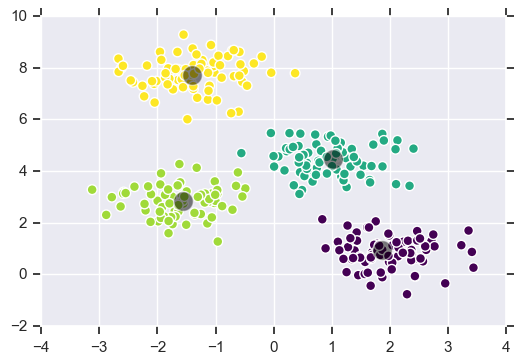

In [35]:
labels, medoids = cluster(distances, k=4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(X[medoids, 0], X[medoids, 1], c='black', s=200, alpha=0.5);

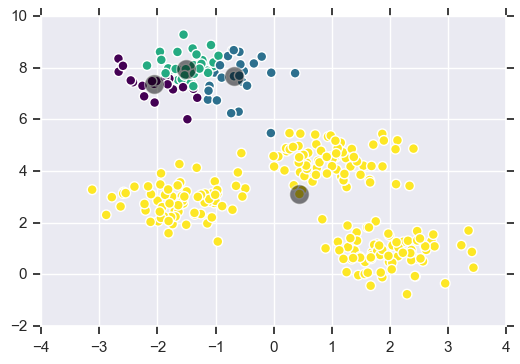

In [36]:
labels, medoids = cluster(distances, k=4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(X[medoids, 0], X[medoids, 1], c='black', s=200, alpha=0.5);